In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Reading CASE-SHILLER House price Index data (target variable)

df_HPI = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\HousePriceIndex.csv")

#Changing data type of date column
df_HPI["DATE"] = pd.to_datetime(df_HPI["DATE"])

#Resetting Index
df_HPI.reset_index(inplace = True)
df_HPI.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_HPI["Year"] = pd.DatetimeIndex(df_HPI["DATE"]).year
df_HPI["Month"] = pd.DatetimeIndex(df_HPI["DATE"]).month

print(df_HPI.shape)
df_HPI.tail()

(249, 4)


,DATE,HousePriceIndex,Year,Month
244,2023-05-01,302.566,2023,5
245,2023-06-01,304.593,2023,6
246,2023-07-01,306.767,2023,7
247,2023-08-01,309.155,2023,8
248,2023-09-01,311.175,2023,9


In [3]:
# Reading Unemployment Rate Data 

df_unemp = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\UNRATE.csv")

print(df_unemp.shape)
df_unemp.tail()

(251, 2)


,DATE,UNRATE
246,7/1/2023,3.5
247,8/1/2023,3.8
248,9/1/2023,3.8
249,NaN,NaN
250,NaN,NaN


In [4]:
df_unemp.drop([249,250], inplace = True)

In [5]:
print(df_unemp.shape)

(249, 2)


In [6]:
# Reading Per Capita GDP Data
df_PerCapitaGDP = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\PerCapitaGDP.csv", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_PerCapitaGDP.shape)
df_PerCapitaGDP.tail()

(83, 2)


,DATE,Per_Capita_GDP
78,7/1/2022,65462
79,10/1/2022,65783
80,1/1/2023,66078
81,4/1/2023,66341
82,7/1/2023,67083


The data is quarterly. 
We will do imputation for rest of the months using linear interpolation after we create the final dataframe combining all the data.

In [7]:
# Reading Interest Rate Data
df_Int_rate = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\InterestRate.csv")
print(df_Int_rate.shape)
df_Int_rate.tail()

(249, 2)


,DATE,InterestRate
244,5/1/2023,5.06
245,6/1/2023,5.08
246,7/1/2023,5.12
247,8/1/2023,5.33
248,9/1/2023,5.33


In [8]:
# Reading Construction Price Index Data
df_cons_price_index = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\ConstructionPriceIndex.csv", names = ["DATE", "Cons_Price_Index"], skiprows = 1)

print(df_cons_price_index.shape)
df_cons_price_index.tail()

(250, 2)


,DATE,Cons_Price_Index
245,6/1/2023,337.336
246,7/1/2023,334.576
247,8/1/2023,333.980
248,9/1/2023,332.224
249,NaN,NaN


In [9]:
df_cons_price_index.drop([249], inplace = True)

In [10]:
print(df_cons_price_index.shape)

(249, 2)


In [11]:
# Urban Population Percent

df_urban = pd.read_excel("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\UrbanPopulation.xlsx")
print(df_urban.shape)
df_urban.tail()

(20, 2)


,Indicator Code,UrbPop
15,2018,82.256
16,2019,82.459
17,2020,82.664
18,2021,82.873
19,2022,83.084


In [13]:
# Number of households

df_households = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\TotalHouseholds.csv", names = ["DATE", "Num_Households"], skiprows = 1)
print(df_households.shape)
df_households.tail()

(21, 2)


,DATE,Num_Households
16,1/1/2019,128579
17,1/1/2020,128451
18,1/1/2021,129224
19,1/1/2022,131202
20,1/1/2023,131434


In [14]:
# Monthly new house supply
df_house = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\NewConstructedUnits.csv", names = ["DATE", "Houses"], skiprows = 1).drop([249])
print(df_house.shape)
df_house.tail()

(249, 2)


,DATE,Houses
244,5/1/2023,1534.0
245,6/1/2023,1492.0
246,7/1/2023,1334.0
247,8/1/2023,1370.0
248,9/1/2023,1478.0


In [15]:
# Real Median Household Income

df_income = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\Income.csv", names = ["DATE", "Income"], skiprows = 1).drop([249])
print(df_income.shape)
df_income.tail()

(249, 2)


,DATE,Income
244,5/1/2023,16818.5
245,6/1/2023,16809.5
246,7/1/2023,16796.9
247,8/1/2023,16799.7
248,9/1/2023,16804.8


In [16]:
# Reading Consumer Price Index dataset
df_CPI = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\CPI.csv", names = ["DATE", "CPI"], skiprows = 1).drop([249])
print(df_CPI.shape)
df_CPI.tail()

(249, 2)


,DATE,CPI
244,5/1/2023,303.294
245,6/1/2023,303.841
246,7/1/2023,304.348
247,8/1/2023,306.269
248,9/1/2023,307.481


In [17]:
# Working age population

df_working = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Shalini\\Data Related resume\\HomeLLC\\Stage1 - Assessment\\Data Collection - Copy\\WorkingAgePopulation.csv", names = ["DATE", "Working_Population"], skiprows = 1).drop([249])
print(df_working.shape)
df_working.tail()

(249, 2)


,DATE,Working_Population
244,5/1/2023,208612844.2
245,6/1/2023,208706920.0
246,7/1/2023,208779237.3
247,8/1/2023,208906586.8
248,9/1/2023,209117169.8


In [18]:
# Merging Per Capita GDP (Quarterly data)
df_PerCapitaGDP["DATE"] = pd.to_datetime(df_PerCapitaGDP["DATE"])
df_HPI = pd.merge(df_HPI,df_PerCapitaGDP, how = "left")
df_HPI.head()


,DATE,HousePriceIndex,Year,Month,Per_Capita_GDP
0,2003-01-01,128.461,2003,1,50462.0
1,2003-02-01,129.355,2003,2,NaN
2,2003-03-01,130.148,2003,3,NaN
3,2003-04-01,130.884,2003,4,50796.0
4,2003-05-01,131.735,2003,5,NaN


In [19]:
# Merging dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_HPI, df_working,df_house, df_CPI, df_unemp, df_cons_price_index, df_Int_rate,df_income]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.head()

(249, 11)


,HousePriceIndex,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Price_Index,InterestRate,Income
DATE,,,,,,,,,,,
2003-01-01,128.461,2003,1,50462.0,185635346.4,1654.0,182.6,5.8,144.4,1.24,10710.4
2003-02-01,129.355,2003,2,NaN,185869692.3,1688.0,183.6,5.9,145.2,1.26,10674.0
2003-03-01,130.148,2003,3,NaN,186085118.2,1638.0,183.9,5.9,145.2,1.25,10696.5
2003-04-01,130.884,2003,4,50796.0,186470754.0,1662.0,183.2,6.0,145.9,1.26,10752.7
2003-05-01,131.735,2003,5,NaN,186649078.0,1733.0,182.9,6.1,145.8,1.26,10832.0


# Checking Missing Values

In [20]:
df.isna().sum()

HousePriceIndex         0
Year                    0
Month                   0
Per_Capita_GDP        166
Working_Population      0
Houses                  0
CPI                     0
UNRATE                  0
Cons_Price_Index        0
InterestRate            0
Income                  0
dtype: int64

The "Per_Capita_GDP" column has missing values because the data was quarterly. The missing values in the other columns is due to unavailability of fresh data. We will first fill the missing values in the "Per_Capita_GDP" column using linear interpolation. We will drop the rows having missing values in the other columns. This means that we will use data from 2003 to 2023

In [21]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()

In [22]:
df.head()

,HousePriceIndex,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Price_Index,InterestRate,Income
DATE,,,,,,,,,,,
2003-01-01,128.461,2003,1,50462.000000,185635346.4,1654.0,182.6,5.8,144.4,1.24,10710.4
2003-02-01,129.355,2003,2,50573.333333,185869692.3,1688.0,183.6,5.9,145.2,1.26,10674.0
2003-03-01,130.148,2003,3,50684.666667,186085118.2,1638.0,183.9,5.9,145.2,1.25,10696.5
2003-04-01,130.884,2003,4,50796.000000,186470754.0,1662.0,183.2,6.0,145.9,1.26,10752.7
2003-05-01,131.735,2003,5,51034.666667,186649078.0,1733.0,182.9,6.1,145.8,1.26,10832.0


In [23]:
df.dropna(inplace = True)

In [24]:
# Checking missing values now
df.isna().sum()

HousePriceIndex       0
Year                  0
Month                 0
Per_Capita_GDP        0
Working_Population    0
Houses                0
CPI                   0
UNRATE                0
Cons_Price_Index      0
InterestRate          0
Income                0
dtype: int64

- There are no missing values in the dataset now.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2003-01-01 to 2023-09-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HousePriceIndex     249 non-null    float64
 1   Year                249 non-null    int64  
 2   Month               249 non-null    int64  
 3   Per_Capita_GDP      249 non-null    float64
 4   Working_Population  249 non-null    float64
 5   Houses              249 non-null    float64
 6   CPI                 249 non-null    float64
 7   UNRATE              249 non-null    float64
 8   Cons_Price_Index    249 non-null    float64
 9   InterestRate        249 non-null    float64
 10  Income              249 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.3 KB


- No missing values in the dataset
- All columns have numeric( int or float) data type
- There are in total 240 rows

# Exploratory Data Analysis

In [26]:
# Dropping Month and Year columns from the dataset as they are not needed in the analysis

df.drop(columns = ["Year", "Month"], inplace = True)
df.head()

,HousePriceIndex,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Price_Index,InterestRate,Income
DATE,,,,,,,,,
2003-01-01,128.461,50462.000000,185635346.4,1654.0,182.6,5.8,144.4,1.24,10710.4
2003-02-01,129.355,50573.333333,185869692.3,1688.0,183.6,5.9,145.2,1.26,10674.0
2003-03-01,130.148,50684.666667,186085118.2,1638.0,183.9,5.9,145.2,1.25,10696.5
2003-04-01,130.884,50796.000000,186470754.0,1662.0,183.2,6.0,145.9,1.26,10752.7
2003-05-01,131.735,51034.666667,186649078.0,1733.0,182.9,6.1,145.8,1.26,10832.0


### Checking the correlation between the variables

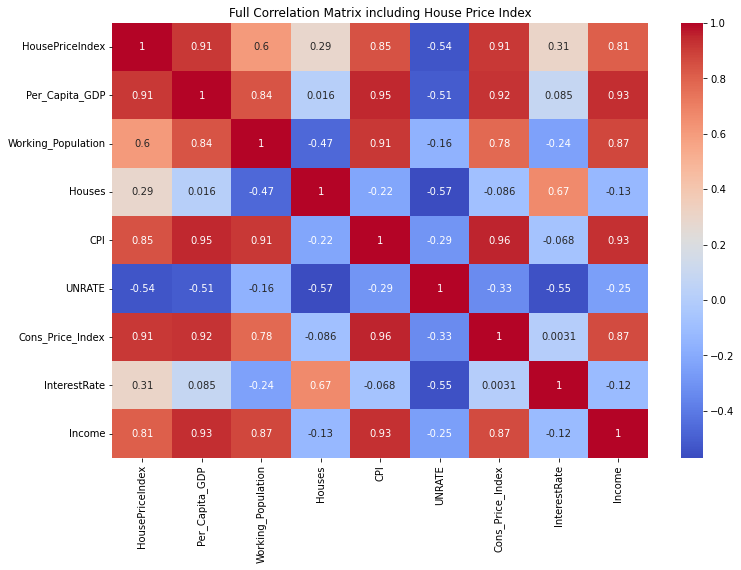

In [27]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Full Correlation Matrix including House Price Index")
plt.show()

The correlation matrix provides valuable insights into how different factors are related to the House Price Index (HPI) and to each other. Here are some key observations:

Certain factors show a strong correlation with the House Price Index, indicating a significant relationship.
The relationships among other economic indicators, such as income, interest rates, per_capita_GDP, and unemployment rate, also offer insights into the broader economic context affecting housing prices.



In [30]:
# Separating the target variable and the independent variable
y = df.pop("HousePriceIndex")
X = df

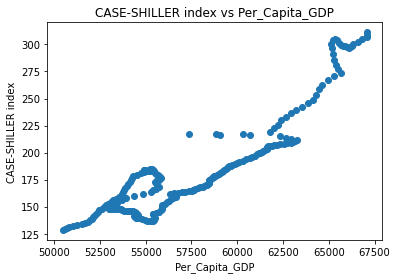

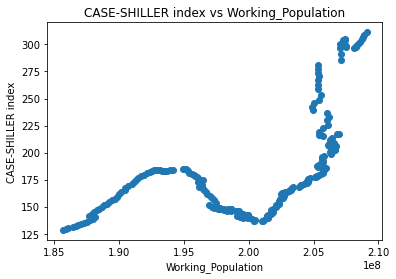

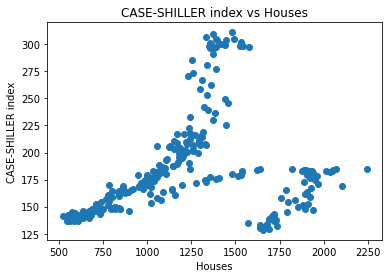

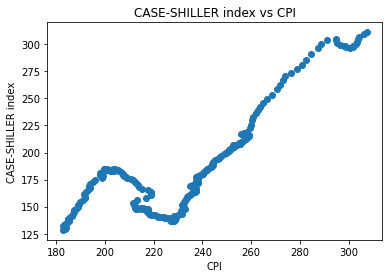

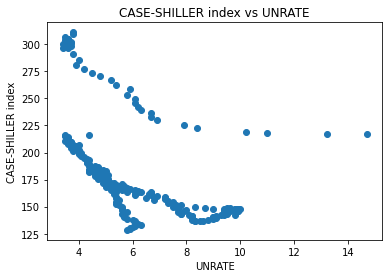

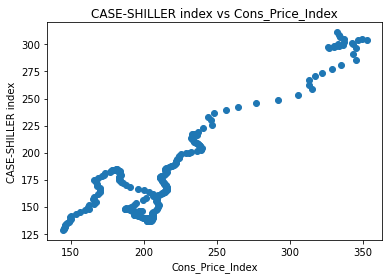

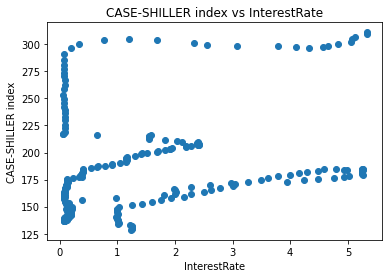

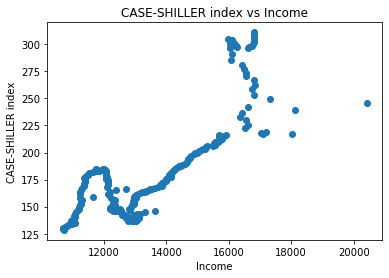

In [31]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

Examining the correlation matrix provided, it is evident that numerous pairs of independent variables exhibit high correlation. To address multicollinearity, we will eliminate one column from each correlated pair, opting to retain the column with a higher correlation with the target variable.

In [32]:
# Dropping multicollinearity columns
mult_cols = ["Working_Population", "CPI",  "Income","Per_Capita_GDP"]
df.drop(columns = mult_cols, inplace = True)
X = df

# Model Building

In [33]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [36]:
# Splitting data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [37]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(pred, y_test)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.942723572307301


- The r2_score is: 0.942723572307301
- The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [38]:
pred

array([165.27809008, 138.83663132, 145.84254121, 167.14267213,
       153.27906937, 192.09408939, 205.43111349, 199.24682468,
       142.71067799, 149.26621787, 204.52074512, 215.47320806,
       203.1210488 , 294.4464372 , 170.98537182, 269.67775569,
       209.96561072, 159.07435966, 175.65257351, 168.3622609 ,
       302.47805873, 164.34759693, 154.75291355, 175.25906924,
       185.0738328 , 189.11976351, 175.87215309, 141.87062365,
       169.47650438, 157.87111235, 199.17549299, 177.43334112,
       172.30497615, 169.02160998, 171.15775417, 154.61233784,
       159.61579809, 208.96181296, 188.74311792, 169.99470913,
       153.71906312, 140.66955087, 147.99234332, 204.38968071,
       202.97463143, 159.80484038, 208.84557165, 165.50649025,
       185.95926525, 195.28053247])

Given that most variables exhibit an upward trend over time, it is anticipated that they will show a strong correlation. Therefore, instead of relying solely on the linear model, we can directly analyze the influence of variables on the home price index through scatter plots.

# Insights

Based on the analysis and the results from the regression model, here are some key insights regarding the target variable, the House Price Index (HPI), in relation to the given features: 
    
- Correlation Insights: Certain features demonstrated notable correlations with the HPI. These correlations indicate potential predictive relationships, although they don't imply causation. Features with higher correlation coefficients (either positive or negative) are likely to have a more significant impact on the HPI. For example, if income or construction price index showed a strong correlation, it suggests they are important factors in predicting house prices. 
- Regression Model Observations: The regression model, despite its limitations as indicated by the negative R² value, provided a basic understanding of how changes in each feature might influence the HPI. Each feature's contribution to the HPI prediction varied. Some features had a more pronounced effect on the predicted HPI when altered, suggesting their greater influence in the housing market.    
- Economic and Demographic Factors: Economic indicators such as interest rates, income levels, and GDP per capita are critical in understanding the housing market dynamics. Changes in these factors could significantly influence house prices. Demographic factors, like urban population and total households, also play a role in shaping housing demand and thus impact prices.
- Market Sensitivity: The housing market is sensitive to a combination of economic conditions. For instance, rising interest rates typically cool down the housing market, while increased income levels might boost it. 
- However, it's important to approach these insights as indicative trends rather than definitive predictions, given the complexities of the housing market and the limitations of the analysis conducted.

# ...THE END...